In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pyart
%matplotlib inline

In [8]:
# Read in the gridded file, create GridMapDisplay object
filename = './data/CHI210723120051.RAWHAFJ'
# filename = './data/TAB191023200503.RAWD9FF'

radar = pyart.io.read(filename)


C:\Users\ladin\anaconda3\envs\radar_panama\lib\site-packages\pyart\io\sigmet.py:131: RuntimeWarning: invalid value encountered in sqrt
  sigmet_data, sigmet_metadata = sigmetfile.read_data(full_xhdr=full_xhdr)


C:\Users\ladin\anaconda3\envs\radar_panama\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\ladin\anaconda3\envs\radar_panama\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


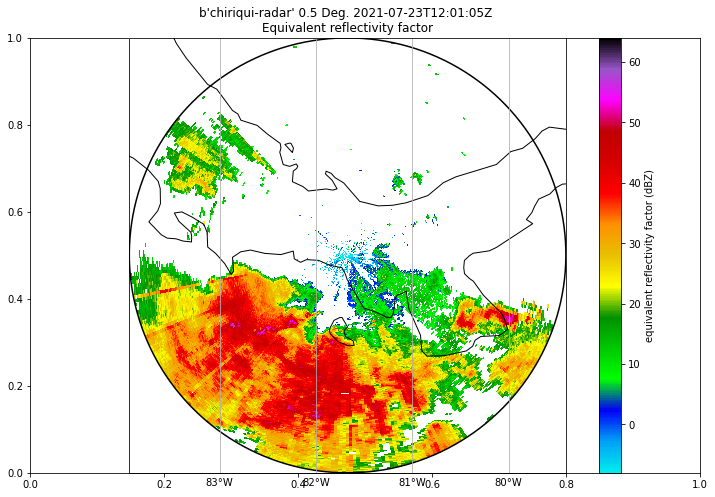

In [9]:
fig = plt.figure(figsize=[12, 8])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=0, resolution='50m',
                     vmin=-8, vmax=64,
                     projection=ccrs.PlateCarree(), cmap='pyart_NWSRef')
display.plot_range_ring(radar.range['data'][-1]/1000)
plt.show()




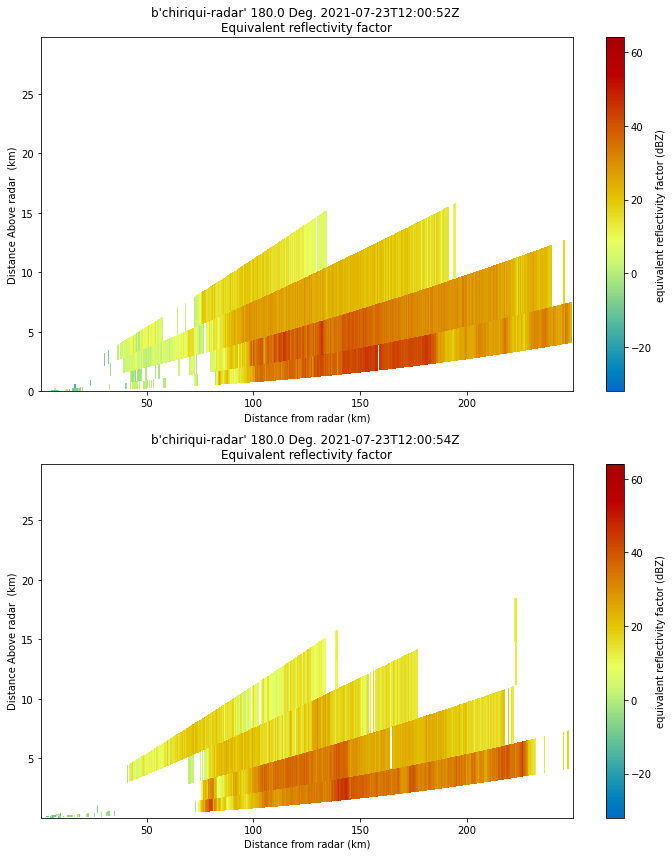

In [12]:
xsect = pyart.util.cross_section_ppi(radar, [180, 210])

display2 = pyart.graph.RadarDisplay(xsect)

fig = plt.figure(figsize=[10,12])

ax = fig.add_subplot(211)
display2.plot('reflectivity', 0, vmin=-32, vmax=64.)

ax = fig.add_subplot(212)
display2.plot('reflectivity', 1, vmin=-32, vmax=64.)

plt.tight_layout()
plt.show()

C:\Users\ladin\anaconda3\envs\radar_panama\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\ladin\anaconda3\envs\radar_panama\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


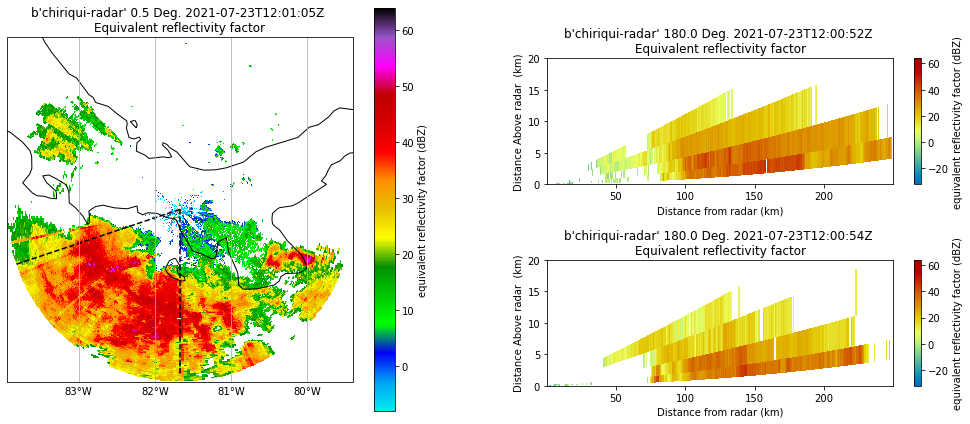

In [32]:
fig = plt.figure(figsize=[15,7])

map_panel_axes = [0.05, 0.05, .4, .80]
x_cut_panel_axes = [0.55, 0.10, .4, .25]
y_cut_panel_axes = [0.55, 0.50, .4, .25]

projection = ccrs.PlateCarree()

ax1 = fig.add_axes(map_panel_axes, projection=projection)
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=0, resolution='50m',
                     vmin=-8, vmax=64,
                     projection=ccrs.PlateCarree(), cmap='pyart_NWSRef')
                     
display.plot_line_xy(np.array([0, -240000]), np.array([0, -80000]),
                     line_style='k--')

display.plot_line_xy(np.array([0., 0.]), np.array([0.0, -240000.0]),
                     line_style='k--')

ax2 = fig.add_axes(y_cut_panel_axes)
display2.plot('reflectivity', 0, vmin=-32, vmax=64.)
ax2.set_ylim(0, 20)
             
ax3 = fig.add_axes(x_cut_panel_axes)
display2.plot('reflectivity', 1, vmin=-32, vmax=64.)
ax3.set_ylim(0, 20)


plt.show()